In [3]:
import xarray as xr
from pcv.map import SEMMap
import numpy as np
import matplotlib.pyplot as plt

/home/anand/.conda/envs/pcv/lib/python3.10/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


# SIMPLE MODEL
```
mod_1 = """

lai_summer ~ lai_spring + t2m_winter +tp_winter
lai_spring ~ t2m_winter +tp_winter

"""
```

In [1]:
model_num = 7
sem_data = xr.open_dataset(f"/data/compoundx/anand/PCV/data/sem_data_{model_num}.nc")

NameError: name 'xr' is not defined

## Plots

### Temperature winter to LAI summer

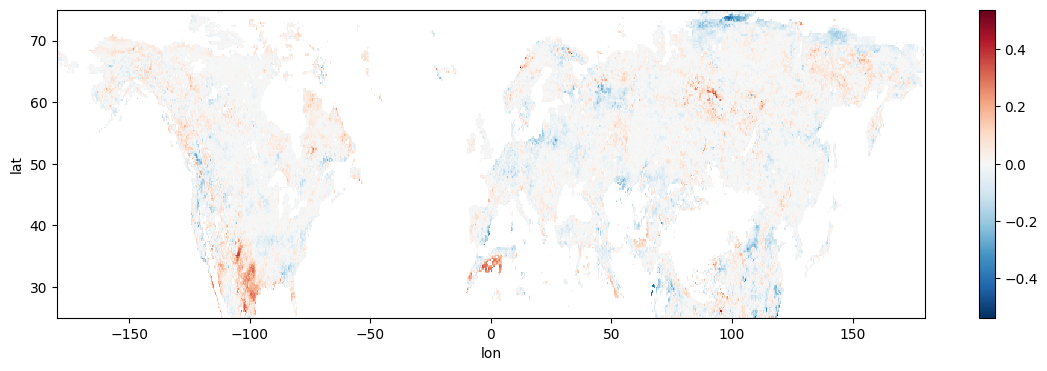

In [9]:
(
    sem_data['lai_spring~t2m_winter_Estimate'] *
    sem_data['lai_summer~lai_spring_Estimate']
).plot(figsize = (14,4))

### Temperature winter to LAI summer (Direct)

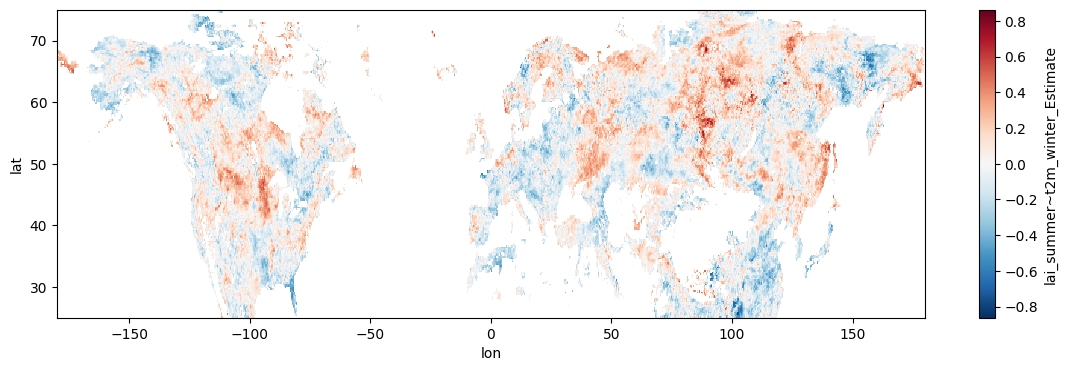

In [10]:
(
    sem_data['lai_summer~t2m_winter_Estimate']
).plot(figsize = (14,4))

### Winter temperature and summer LAI correlation
![Temperature winter - summer LAI](images/corr_lai_s_t2m_winter.png)


### Total strenght of the link

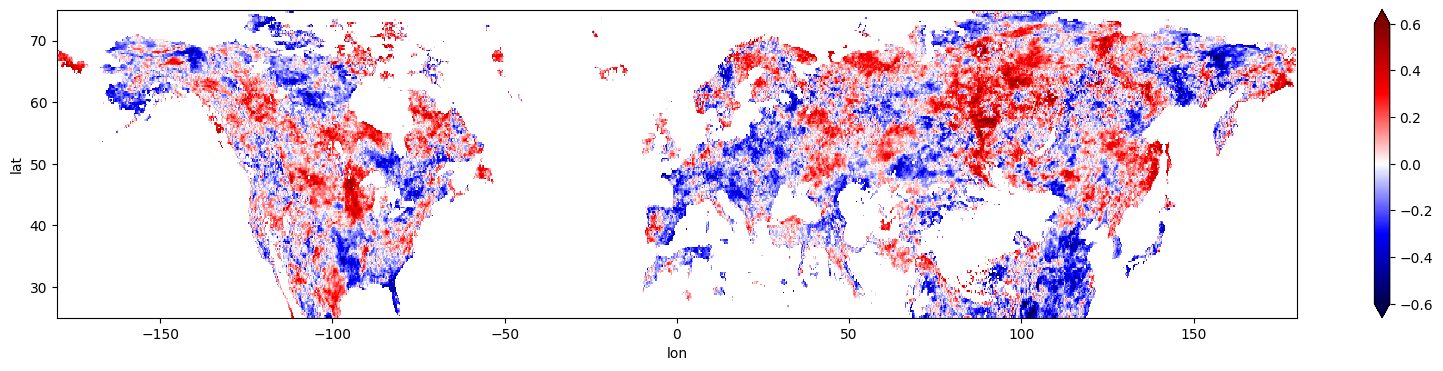

In [30]:
((
    sem_data['lai_spring~t2m_winter_Estimate'] *
    sem_data['lai_summer~lai_spring_Estimate']
)
+
(
    sem_data['lai_summer~t2m_winter_Estimate']
)
).plot(figsize = (20,4), cmap = "seismic", vmin = -0.6, vmax = 0.6)

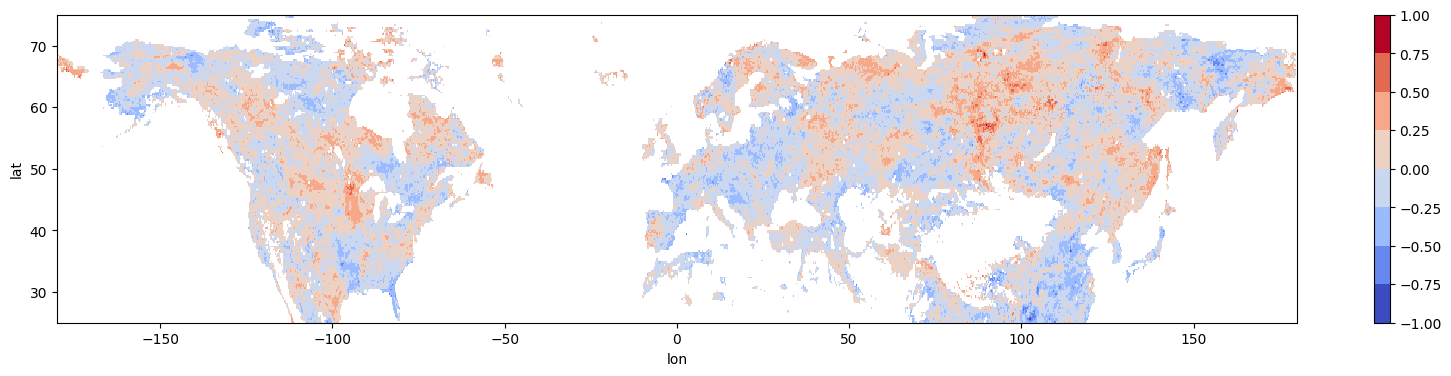

In [32]:
((
    sem_data['lai_spring~t2m_winter_Estimate'] *
    sem_data['lai_summer~lai_spring_Estimate']
)
+
(
    sem_data['lai_summer~t2m_winter_Estimate']
)
).plot(figsize = (20,4), cmap = "coolwarm", vmin = -1, vmax = 1, levels = 9)

### Plot from the code 

In [18]:
path_1 = "tp_winter |>  lai_summer"
path_2 = "tp_winter |>  lai_spring |> lai_summer"

sem_map = SEMMap(sem_data)
sem_map.path_map([path_1, path_2], f"/data/compoundx/anand/PCV/scratch.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/anand/.conda/envs/pcv/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


![](scratch.png)

# Simple Usable Model
```

mod_7 = """
# measurement model

lai_summer ~ swvlall_summer + lai_spring
swvlall_summer ~ lai_spring + swvlall_spring
lai_spring ~ swvlall_spring 
swvlall_spring ~ swvlall_winter 
swvlall_winter ~ t2m_winter+ tp_winter

"""
```


In [35]:
model_num = 7
sem_data = xr.open_dataset(f"/data/compoundx/anand/PCV/data/sem_data_{model_num}.nc")

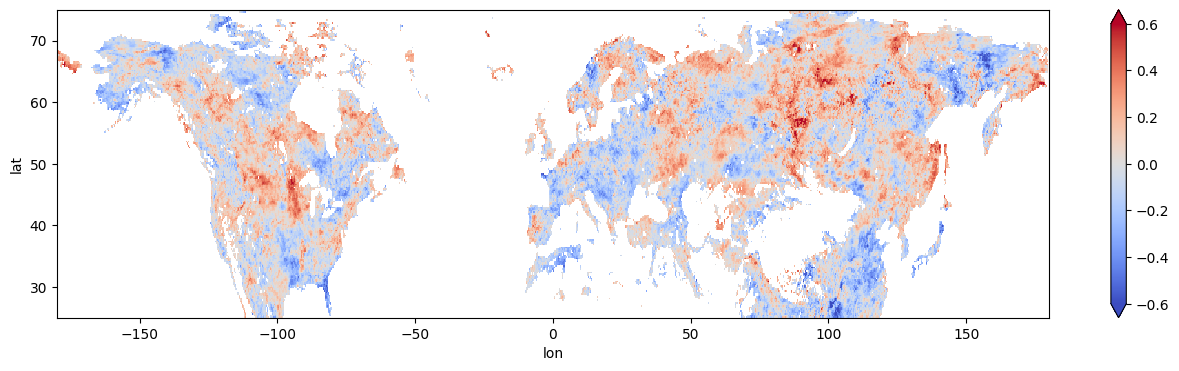

In [32]:
((
    sem_data['lai_summer~swvlall_summer_Estimate'] * 
    sem_data['swvlall_summer~swvlall_spring_Estimate'] *
    sem_data['swvlall_spring~swvlall_winter_Estimate'] *
    sem_data['swvlall_winter~t2m_winter_Estimate']
) 
+ 
(
    sem_data['lai_summer~swvlall_summer_Estimate'] *
    sem_data['swvlall_summer~lai_spring_Estimate'] *
    sem_data['lai_spring~swvlall_spring_Estimate'] *
    sem_data['swvlall_spring~swvlall_winter_Estimate'] *
    sem_data['swvlall_winter~t2m_winter_Estimate']

)
+ 
(
    sem_data['lai_summer~lai_spring_Estimate'] *
    sem_data['lai_spring~swvlall_spring_Estimate'] *
    sem_data['swvlall_spring~swvlall_winter_Estimate'] *
    sem_data['swvlall_winter~t2m_winter_Estimate']

)
+
(
    sem_data['lai_summer~t2m_winter_Estimate'] 
)
).plot(figsize = (16,4), cmap = "coolwarm", vmin = -0.6, vmax = 0.6)
plt.savefig("t2m_8.png")

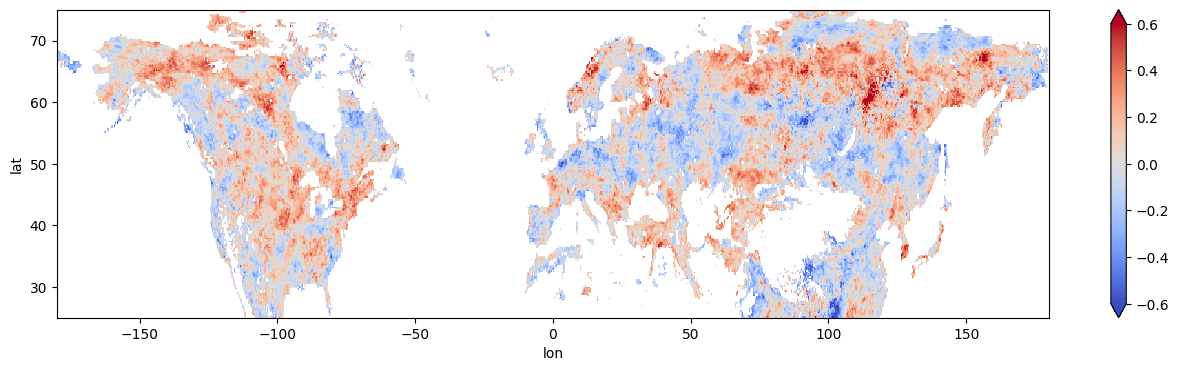

In [33]:
((
    sem_data['lai_summer~swvlall_summer_Estimate'] * 
    sem_data['swvlall_summer~swvlall_spring_Estimate'] *
    sem_data['swvlall_spring~swvlall_winter_Estimate'] *
    sem_data['swvlall_winter~tp_winter_Estimate']
) 
+ 
(
    sem_data['lai_summer~swvlall_summer_Estimate'] *
    sem_data['swvlall_summer~lai_spring_Estimate'] *
    sem_data['lai_spring~swvlall_spring_Estimate'] *
    sem_data['swvlall_spring~swvlall_winter_Estimate'] *
    sem_data['swvlall_winter~tp_winter_Estimate']

)
+ 
(
    sem_data['lai_summer~lai_spring_Estimate'] *
    sem_data['lai_spring~swvlall_spring_Estimate'] *
    sem_data['swvlall_spring~swvlall_winter_Estimate'] *
    sem_data['swvlall_winter~tp_winter_Estimate']

)
+
(
    sem_data['lai_summer~tp_winter_Estimate'] 
)
).plot(figsize = (16,4), cmap = "coolwarm", vmin = -0.6, vmax = 0.6)
plt.savefig("tp_8.png")

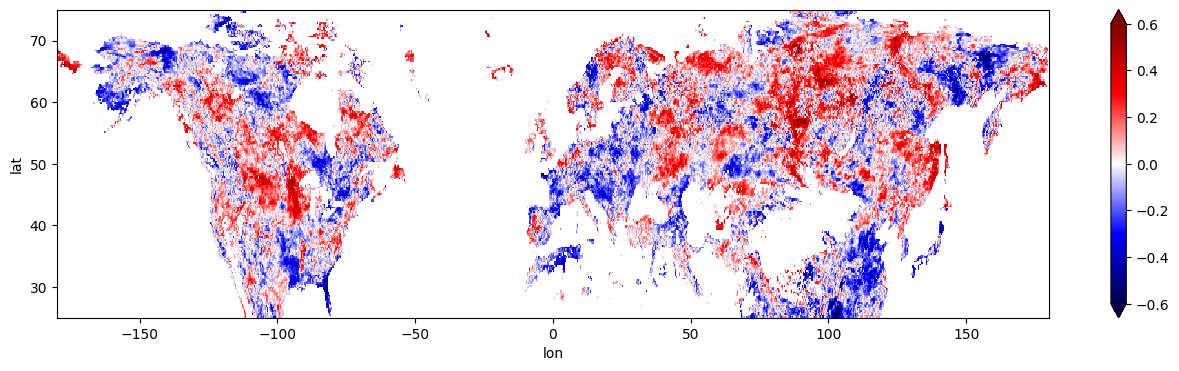

In [28]:
((
    sem_data['lai_summer~swvlall_summer_Estimate'] * 
    sem_data['swvlall_summer~swvlall_spring_Estimate'] *
    sem_data['swvlall_spring~swvlall_winter_Estimate'] *
    sem_data['swvlall_winter~t2m_winter_Estimate']
) 
+ 
(
    sem_data['lai_summer~swvlall_summer_Estimate'] *
    sem_data['swvlall_summer~lai_spring_Estimate'] *
    sem_data['lai_spring~swvlall_spring_Estimate'] *
    sem_data['swvlall_spring~swvlall_winter_Estimate'] *
    sem_data['swvlall_winter~t2m_winter_Estimate']

)
+ 
(
    sem_data['lai_summer~lai_spring_Estimate'] *
    sem_data['lai_spring~swvlall_spring_Estimate'] *
    sem_data['swvlall_spring~swvlall_winter_Estimate'] *
    sem_data['swvlall_winter~t2m_winter_Estimate']

)
+
(sem_data['lai_summer~t2m_winter_Estimate']
)
).plot(figsize = (16,4), cmap = "seismic", vmin = -0.6, vmax = 0.6)
plt.savefig("t2m_total.png")

### Winter temperature and summer LAI correlation
![Temperature winter - summer LAI](images/corr_lai_s_t2m_winter.png)


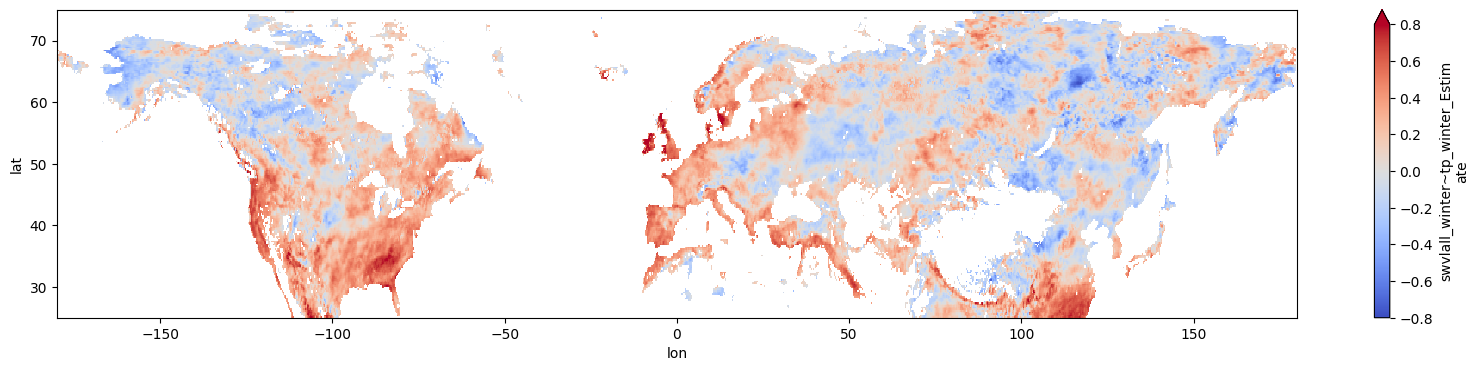

In [10]:
(sem_data['swvlall_winter~tp_winter_Estimate']
).plot(figsize = (20,4), vmin = -0.8, vmax = 0.8, cmap = "coolwarm")
plt.savefig("1_sm_winter_tp_winter.png")

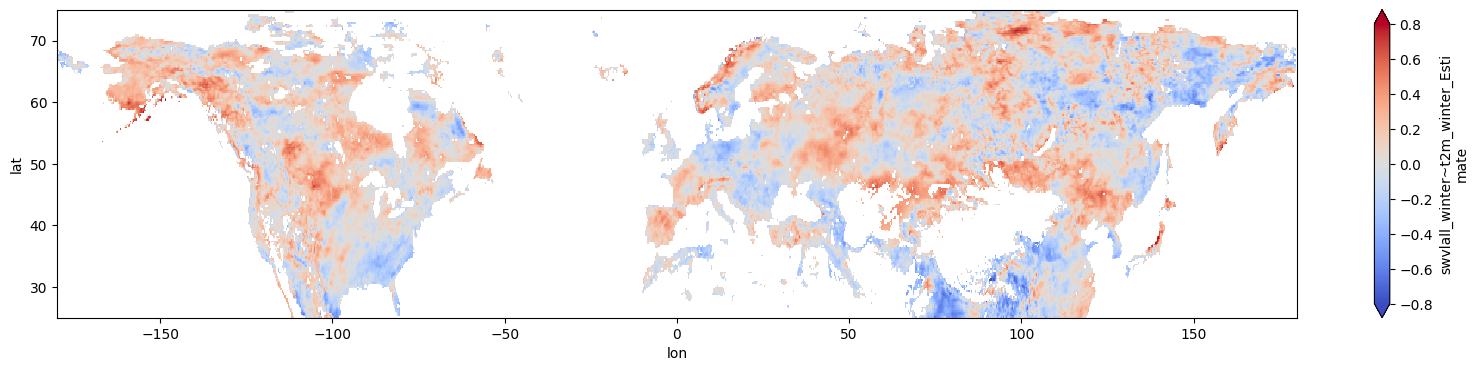

In [11]:
(sem_data['swvlall_winter~t2m_winter_Estimate']
).plot(figsize = (20,4), vmin = -0.8, vmax = 0.8, cmap = "coolwarm")
plt.savefig("2_sm_winter_t2m_winter.png")

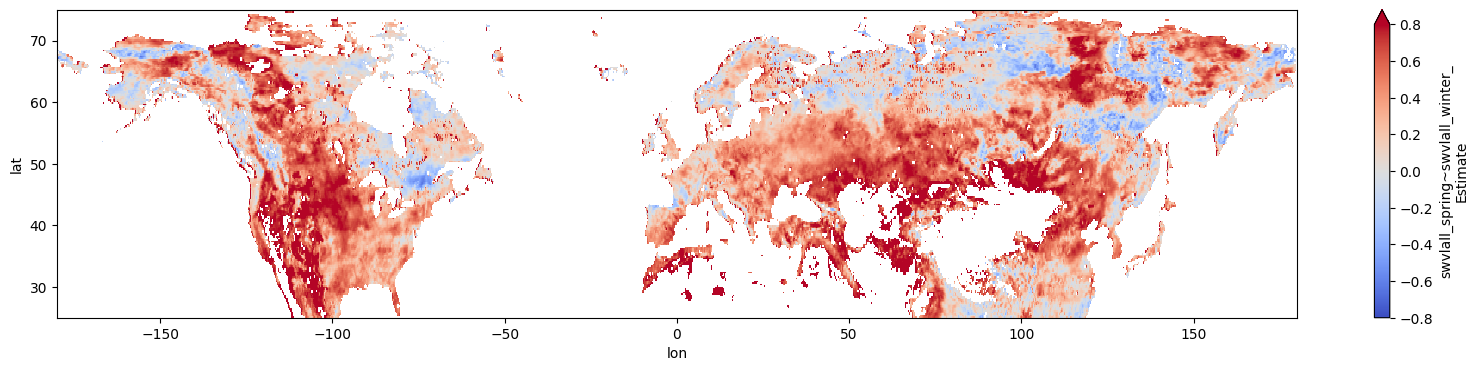

In [12]:
(sem_data['swvlall_spring~swvlall_winter_Estimate']
).plot(figsize = (20,4), vmin = -0.8, vmax = 0.8, cmap = "coolwarm")
plt.savefig("3_sm_spring_sm_winter.png")

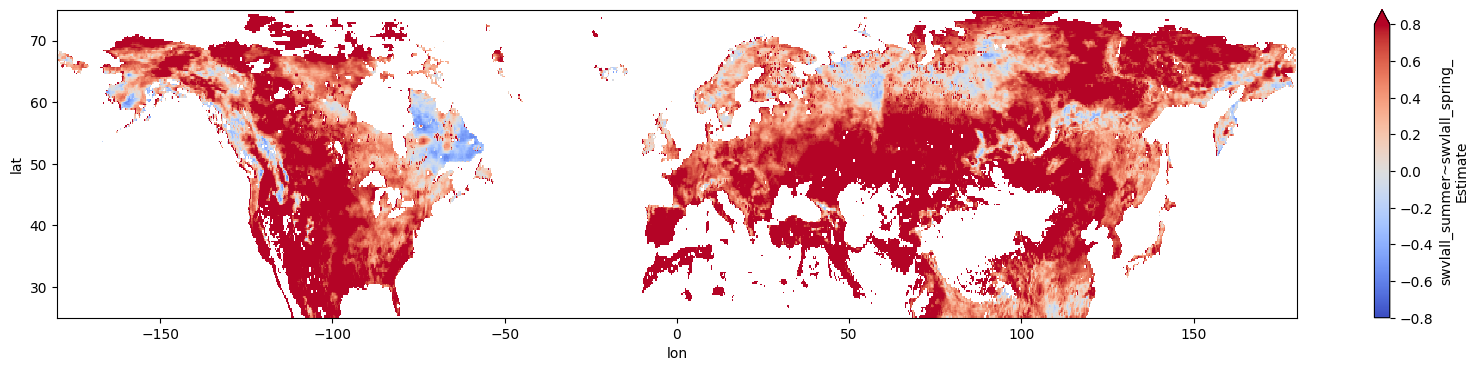

In [14]:
(sem_data['swvlall_summer~swvlall_spring_Estimate']
).plot(figsize = (20,4), vmin = -0.8, vmax = 0.8, cmap = "coolwarm")
plt.savefig("4_sm_summer_sm_spring.png")

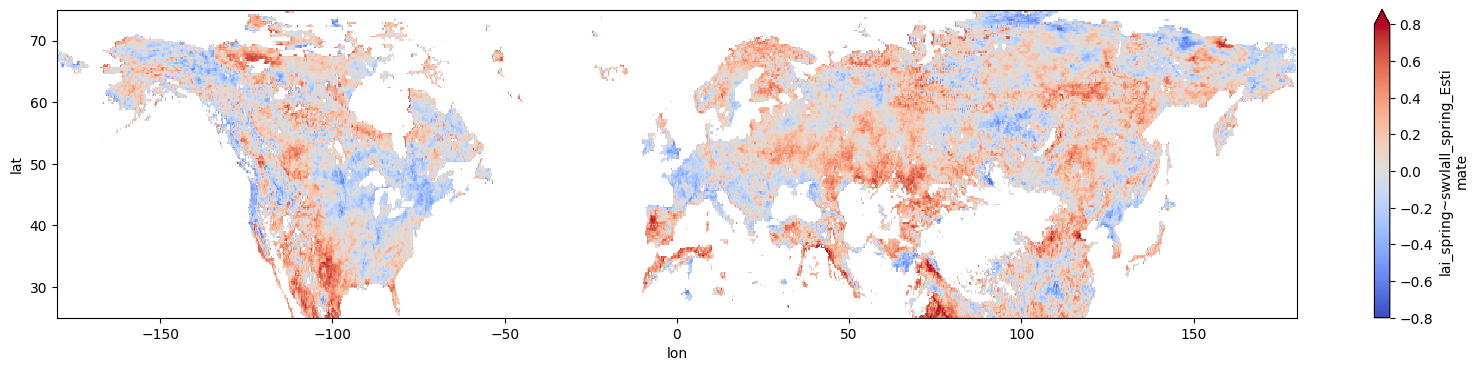

In [15]:
(sem_data['lai_spring~swvlall_spring_Estimate']
).plot(figsize = (20,4), vmin = -0.8, vmax = 0.8, cmap = "coolwarm")
plt.savefig("5_lai_spring_sm_spring.png")

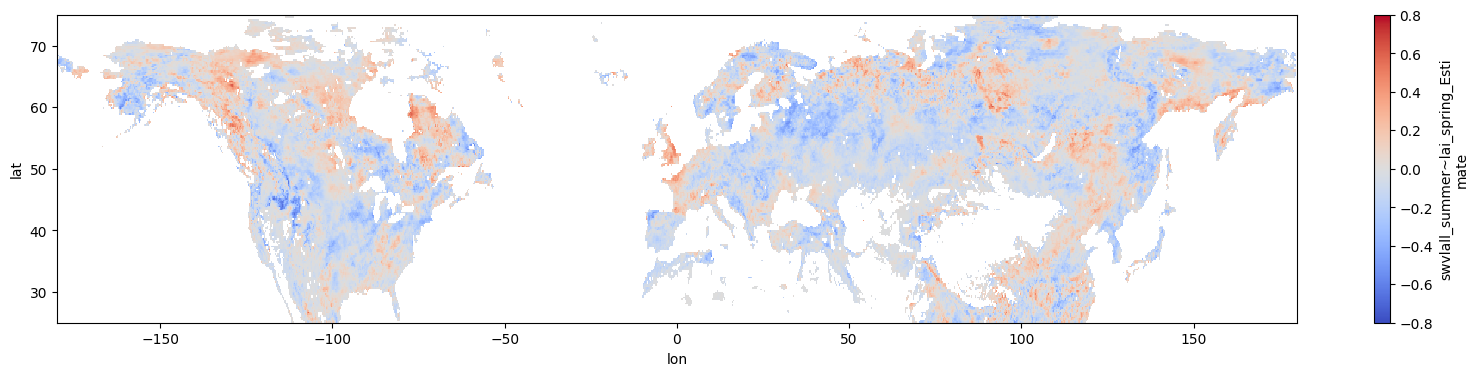

In [16]:
(sem_data['swvlall_summer~lai_spring_Estimate']
).plot(figsize = (20,4), vmin = -0.8, vmax = 0.8, cmap = "coolwarm")
plt.savefig("6_sm_spring_lai_spring.png")

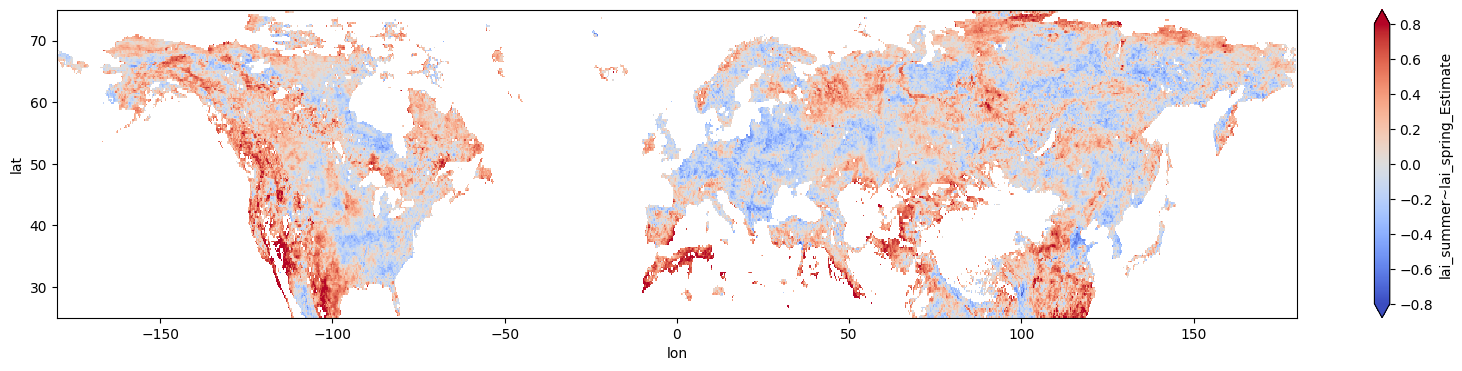

In [17]:
(sem_data['lai_summer~lai_spring_Estimate']
).plot(figsize = (20,4), vmin = -0.8, vmax = 0.8, cmap = "coolwarm")
plt.savefig("7_lai_summer_lai_spring.png")

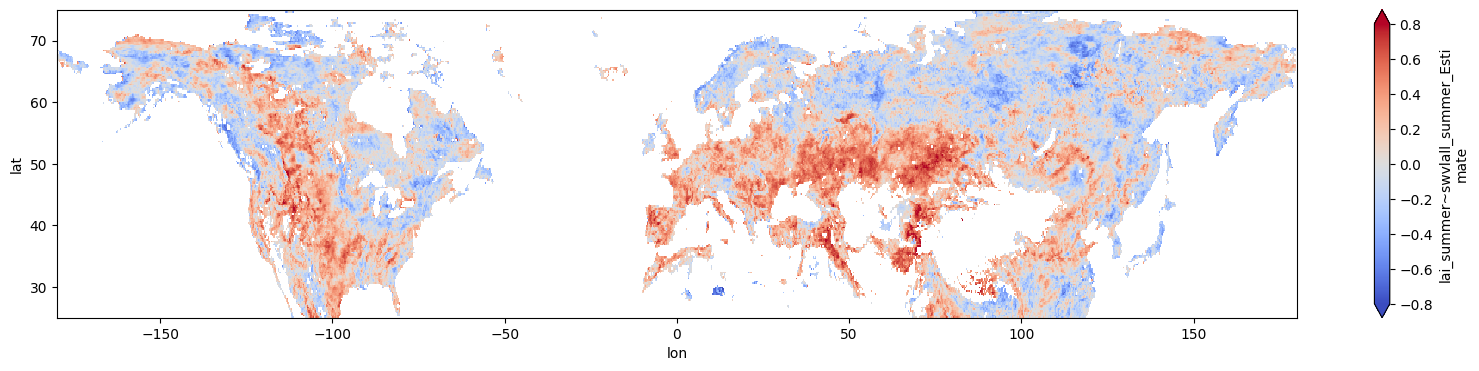

In [18]:
(sem_data['lai_summer~swvlall_summer_Estimate']
).plot(figsize = (20,4), vmin = -0.8, vmax = 0.8, cmap = "coolwarm")
plt.savefig("8_lai_summer_sm_summer.png")

In [ ]:
(sem_data['lai_summer~tp_winter_Estimate']
).plot(figsize = (20,4))
plt.savefig("9_lai_summer_tp_summer.png")

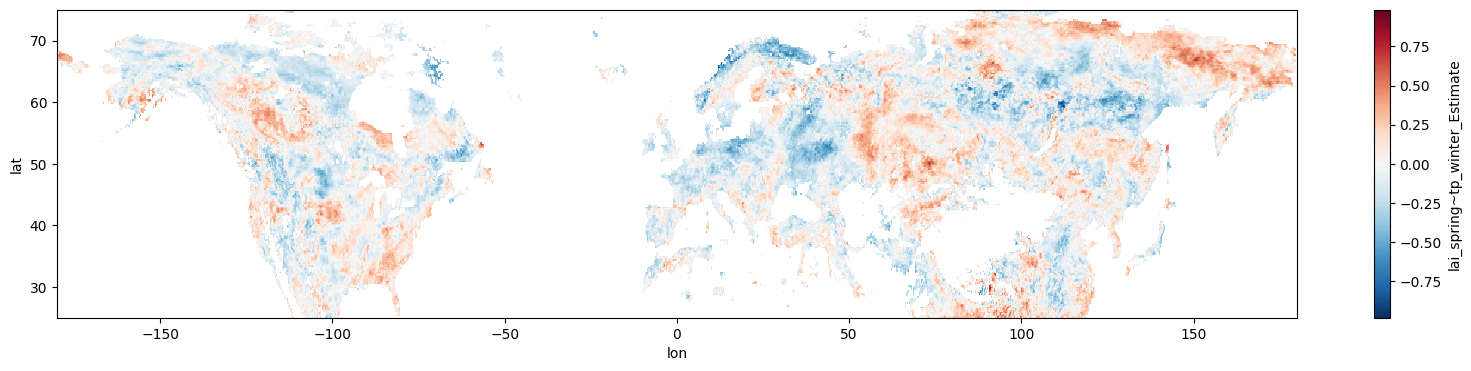

In [3]:
(sem_data['lai_spring~tp_winter_Estimate']
).plot(figsize = (20,4))
plt.savefig("11_lai_spring_tp_winter.png")

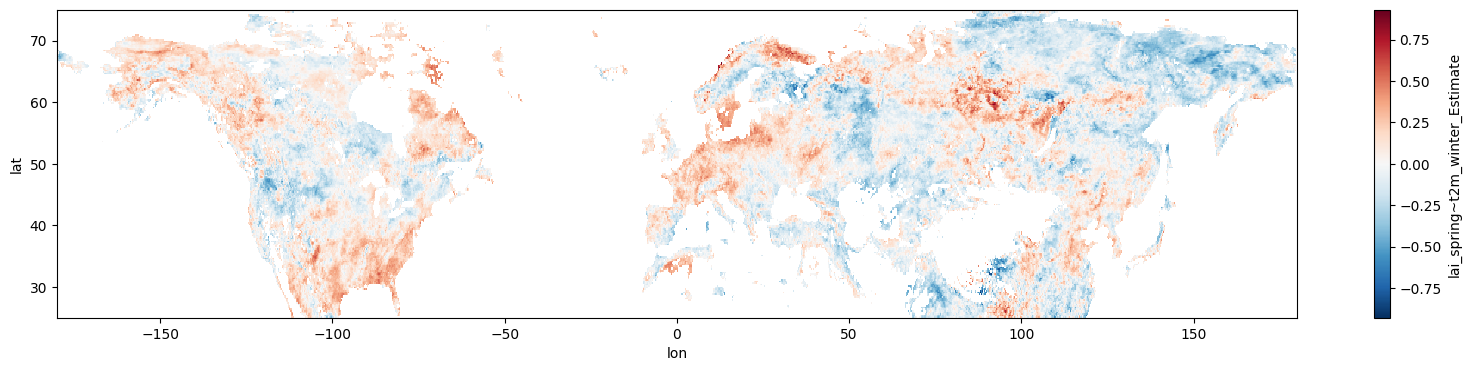

In [4]:
(sem_data['lai_spring~t2m_winter_Estimate']
).plot(figsize = (20,4))
plt.savefig("12_lai_spring_t2m_winter.png")

In [34]:
sem_data

<xarray.Dataset>
Dimensions:                                  (lat: 200, lon: 1440)
Coordinates:
  * lat                                      (lat) float64 25.12 25.38 ... 74.88
  * lon                                      (lon) float64 -179.9 ... 179.9
Data variables: (12/61)
    swvlall_summer~lai_spring_Estimate       (lat, lon) float64 ...
    swvlall_summer~lai_spring_Std. Err       (lat, lon) float64 ...
    swvlall_summer~lai_spring_z-value        (lat, lon) float64 ...
    swvlall_summer~lai_spring_p-value        (lat, lon) float64 ...
    swvlall_summer~swvlall_spring_Estimate   (lat, lon) float64 ...
    swvlall_summer~swvlall_spring_Std. Err   (lat, lon) float64 ...
    ...                                       ...
    swvlall_summer~~swvlall_summer_p-value   (lat, lon) float64 ...
    lai_summer~~lai_summer_Estimate          (lat, lon) float64 ...
    lai_summer~~lai_summer_Std. Err          (lat, lon) float64 ...
    lai_summer~~lai_summer_z-value           (lat, lon) float64 ...
    lai_summer~~lai_summer_p-value           (lat, lon) float64 ...
    chi2p                                    (lat, lon) float64 ...

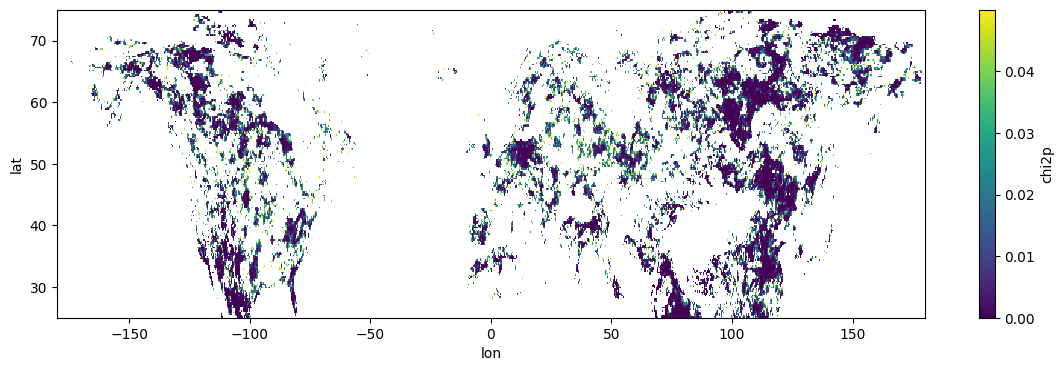

In [52]:
model_num = 7
sem_data = xr.open_dataset(f"/data/compoundx/anand/PCV/data/sem_data_{model_num}.nc")
sem_data["chi2p"].where(sem_data["chi2p"]<0.05).plot(figsize = (14, 4))

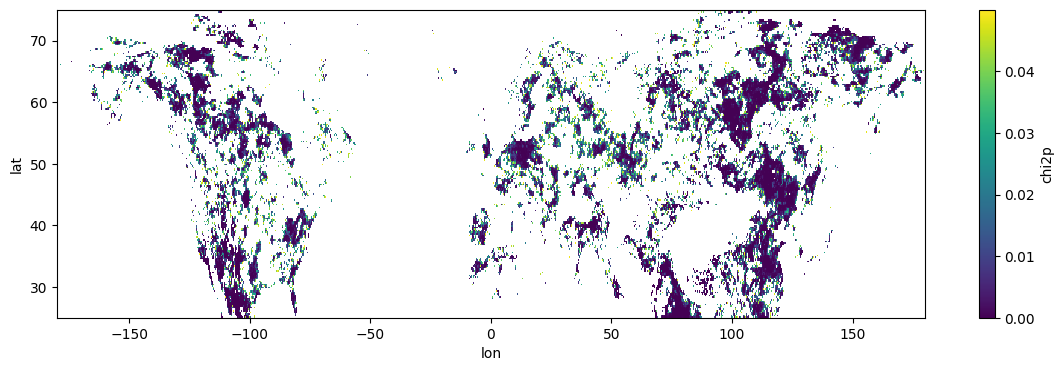

In [51]:
model_num = 8
sem_data = xr.open_dataset(f"/data/compoundx/anand/PCV/data/sem_data_{model_num}.nc")
sem_data["chi2p"].where(sem_data["chi2p"]<0.05).plot(figsize = (14, 4))